In [2]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
cc_data = pd.read_csv("/Users/sarakleine-kracht/Desktop/Project_1_Group_3/cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,264421,2020-08-10 20:51:43,home,89.89,Issaquah,WA,47.4974,-122.0107,50489,1984-02-29,48.036797,-121.213440,F
1,142181,2019-11-27 03:24:33,gas_transport,94.68,Redford,MO,37.3272,-91.0243,241,1974-10-27,36.598969,-90.665853,NaN
2,85904,2019-07-25 13:00:43,travel,6.58,Thompson,UT,38.9999,-109.6150,46,1987-04-23,39.782704,-109.798283,NaN
3,283240,2020-09-20 02:26:52,grocery_pos,183.11,Meridian,ID,43.6498,-116.4306,84106,1971-02-11,43.572589,-117.145660,F
4,328015,2020-12-18 04:48:00,grocery_pos,103.79,Fiddletown,CA,38.5234,-120.6763,832,1987-05-19,39.110742,-120.716384,M


Fraudulent Transaction Category Analysis

In [4]:
base_category = pd.DataFrame(cc_data["category"].value_counts())
base_category_df = base_category.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
base_category_df

,count
category,
Gas and Transport,1066
Home,969
Grocery (In Store),932
Kids and Pets,884
Shopping (In Store),879
Shopping (Online),776
Entertainment,725
Personal Care,714
Food and Dining,679


The category with the highest number of fraudulent transactions is gas and transport with 1,066 transactions. The category with the lowest number of fraudulent transactions is Travel with 294 transactions.

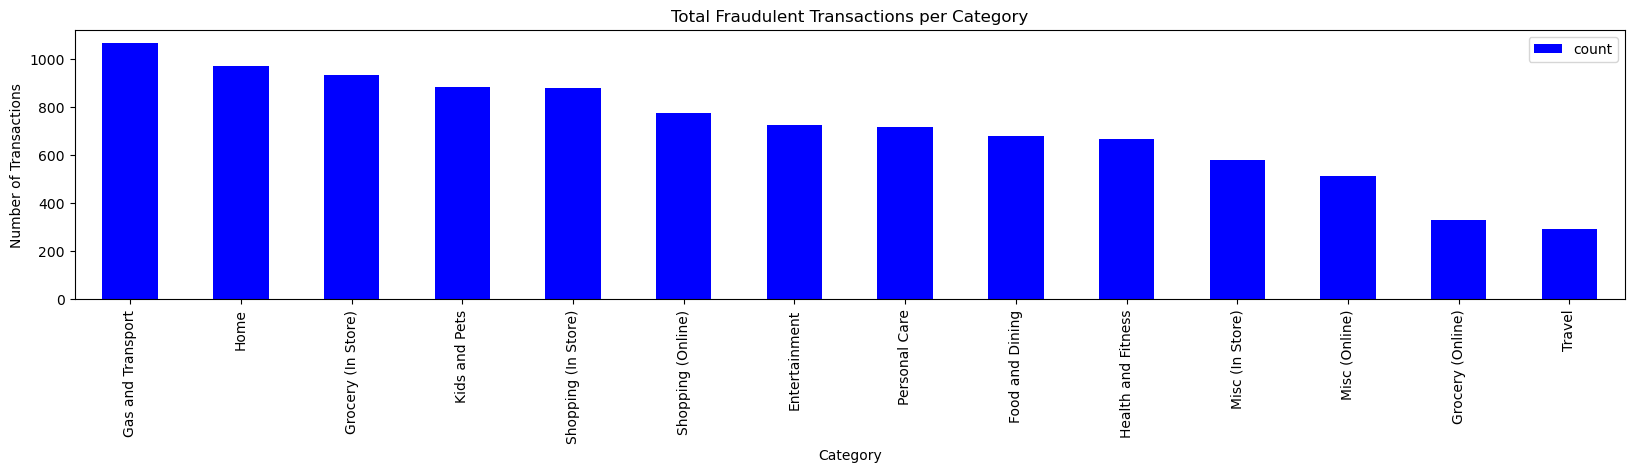

<Figure size 640x480 with 0 Axes>

In [11]:

category_bar = base_category_df.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Fraudulent Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()
plt.tight_layout()

In [9]:
grouped_category_df = cc_data.groupby(["category"])
grouped_category_df.head(20)

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,264421,2020-08-10 20:51:43,home,89.89,Issaquah,WA,47.4974,-122.0107,50489,1984-02-29,48.036797,-121.213440,F
1,142181,2019-11-27 03:24:33,gas_transport,94.68,Redford,MO,37.3272,-91.0243,241,1974-10-27,36.598969,-90.665853,NaN
2,85904,2019-07-25 13:00:43,travel,6.58,Thompson,UT,38.9999,-109.6150,46,1987-04-23,39.782704,-109.798283,NaN
3,283240,2020-09-20 02:26:52,grocery_pos,183.11,Meridian,ID,43.6498,-116.4306,84106,1971-02-11,43.572589,-117.145660,F
4,328015,2020-12-18 04:48:00,grocery_pos,103.79,Fiddletown,CA,38.5234,-120.6763,832,1987-05-19,39.110742,-120.716384,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,192916,2020-03-11 22:51:11,travel,5.32,Wendel,CA,40.3406,-120.2824,104,1989-08-16,39.571493,-120.682882,NaN
465,271994,2020-08-25 13:07:02,travel,3.64,Ruidoso,NM,33.3305,-105.6933,8874,2000-08-16,33.523737,-106.366627,F
493,246676,2020-07-07 20:08:03,travel,2.92,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,37.079563,-122.948755,F
610,298066,2020-10-25 16:55:01,travel,5.20,Sun City,CA,33.7467,-117.1721,54287,1972-09-22,33.565911,-116.921286,F


In [10]:
category_amt = grouped_category_df['amt'].sum()
cleaned_category_amt = category_amt.rename(index= {'gas_transport': 'Gas and Transport', 'home': 'Home', 'grocery_pos': 'Grocery (In Store)', 'shopping_pos': "Shopping (In Store)", 'kids_pets': 'Kids and Pets', 'entertainment': 'Entertainment', 'health_fitness': 'Health and Fitness', 'personal_care': 'Personal Care', 'food_dining': 'Food and Dining', 'shopping_net': 'Shopping (Online)', 'misc_pos': 'Misc (In Store)', 'misc_net': 'Misc (Online)', 'grocery_net': 'Grocery (Online)', 'travel': 'Travel'})
cleaned_category_amt

category
Entertainment           51258.86
Food and Dining         33305.57
Gas and Transport       67056.77
Grocery (Online)        18001.88
Grocery (In Store)     117337.18
Health and Fitness      34751.26
Home                    54488.42
Kids and Pets           48757.23
Misc (Online)           45147.03
Misc (In Store)         38726.23
Personal Care           35896.19
Shopping (Online)       72717.17
Shopping (In Store)     70559.30
Travel                  31500.30
Name: amt, dtype: float64

The Grocery (In Store) category had the highest total loss in dollars with $107,104.88. The Grocery (Online) category had the lowest total loss in dollars with $18,965.07.

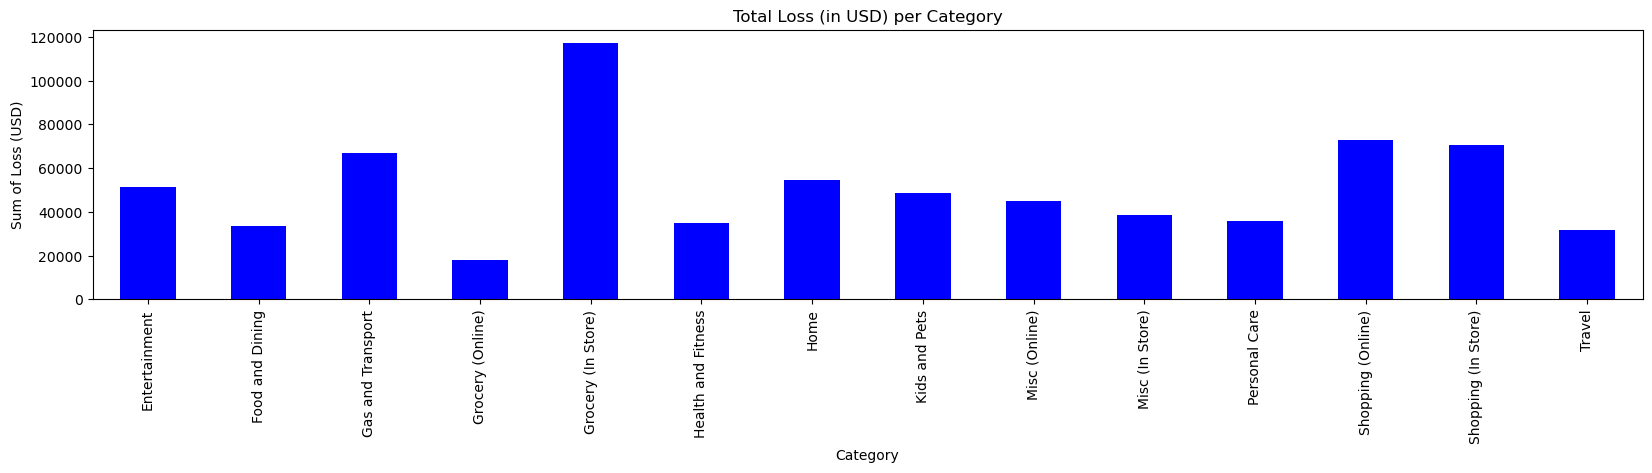

<Figure size 640x480 with 0 Axes>

In [8]:
category_totals_bar = cleaned_category_amt.plot(kind="bar", color= 'b', figsize=(20,3.5))
plt.title("Total Loss (in USD) per Category")
plt.xlabel("Category")
plt.ylabel("Sum of Loss (USD)")
plt.show()
plt.tight_layout()